# 4.3.1. Train, Validation, and Testing Split (PCA)

In [44]:
# Stack the PCA transformed features and the target labels horizontally
X_pca_with_labels = np.hstack((X_pca, np.array(y)[:, np.newaxis]))

# Split the PCA transformed features and the target labels into X and y arrays
X_with_labels = X_pca_with_labels[:, :-1]
y = X_pca_with_labels[:, -1]

In [45]:
# PCA Train,Val,Test
# Split the data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_with_labels, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=2/9, random_state=42)

# Print the shapes of the train, validation, and test sets
print("Train set shape: ", X_train.shape, y_train.shape)
print("Validation set shape: ", X_val.shape, y_val.shape)
print("Test set shape: ", X_test.shape, y_test.shape)


Train set shape:  (2100, 256) (2100,)
Validation set shape:  (600, 256) (600,)
Test set shape:  (300, 256) (300,)


In [47]:
X_train_pca = pca.fit_transform(X_train.reshape(X_train.shape[0], -1))
X_test_pca = pca.transform(X_test.reshape(X_test.shape[0], -1))
X_val_pca = pca.transform(X_val.reshape(X_val.shape[0], -1))

In [49]:
# Reshape the data back into a 3D format for input into a CNN
X_train_pca = X_train_pca.reshape(X_train.shape[0], pca_n, pca_n, 1)
X_test_pca = X_test_pca.reshape(X_test.shape[0], pca_n, pca_n, 1)
X_val_pca = X_val_pca.reshape(X_val.shape[0], pca_n, pca_n, 1)

# 4.3.2.1.2 Hyperparameter Tuning

C:\Users\user\AppData\Local\Temp\ipykernel_12544\842799654.py:25: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Best: 0.234762 using {'batch_size': 64, 'epochs': 50, 'learning_rate': 0.001}


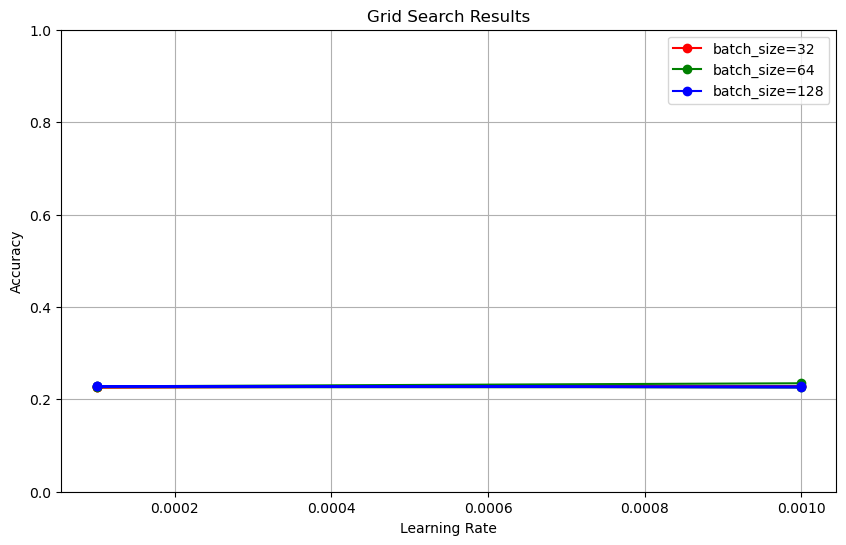

In [62]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt

# Define the function to create the model
def create_model(learning_rate=0.001):
    model = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(pca_n, pca_n, 1)),
                tf.keras.layers.MaxPool2D(2,2),
                tf.keras.layers.Dropout(0.1),
                tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                tf.keras.layers.MaxPool2D(2,2),
                tf.keras.layers.Dropout(0.1),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(1,activation='relu'),
                tf.keras.layers.Dropout(0.2),
                tf.keras.layers.Dense(num_classes,activation='softmax') 
            ])
    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=['accuracy'])
    return model

# Create a KerasClassifier for use with scikit-learn
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the grid search parameters
param_grid = {
              'batch_size': [32, 64, 128],
              'epochs': [50, 100],
              'learning_rate': [0.001, 0.0001]
             }

# Perform grid search with 5-fold cross-validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_result = grid.fit(X_train_pca, y_train_one_hot)

# Print the best parameters and score
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


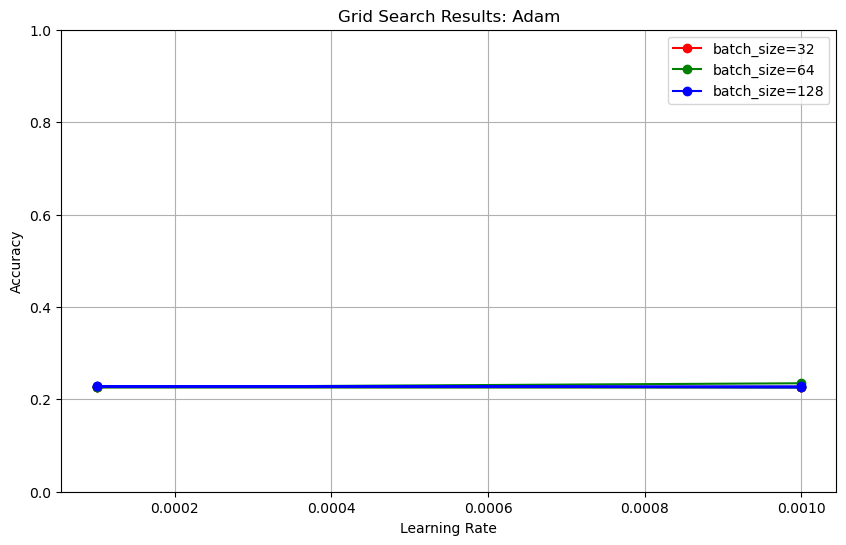

In [64]:
# Get the results of the grid search
results = grid_result.cv_results_

# Plot the results
plt.figure(figsize=(10,6))
plt.title("Grid Search Results: Adam")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.grid(True)
plt.ylim([0,1])

for batch_size, color in zip([32, 64, 128], ['r', 'g', 'b']):
    batch_mask = results['param_batch_size'] == batch_size
    epochs = results['param_epochs'][batch_mask]
    lr = results['param_learning_rate'][batch_mask]
    accuracy = results['mean_test_score'][batch_mask]
    label = f'batch_size={batch_size}'
    plt.plot(lr, accuracy, f'{color}o-', label=label)

plt.legend()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_12544\1267266880.py:25: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Best: 0.234762 using {'batch_size': 64, 'epochs': 50, 'learning_rate': 0.001}


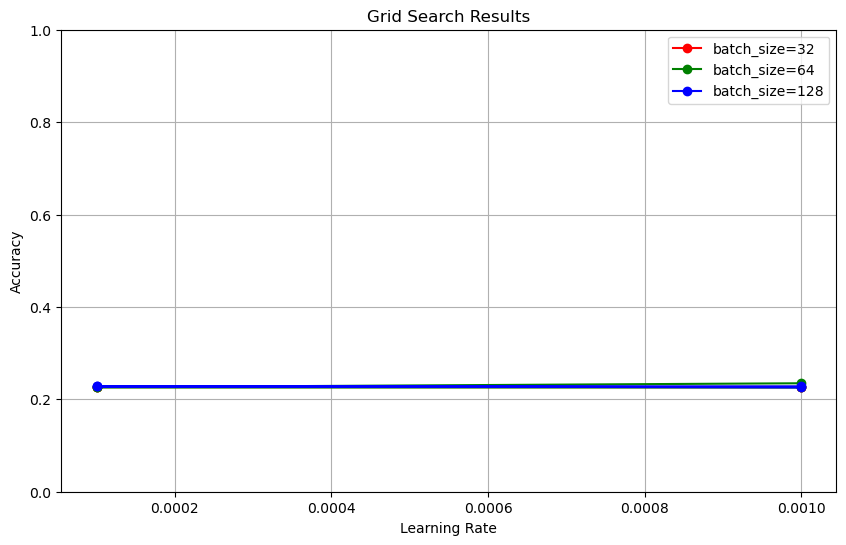

In [63]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt

# Define the function to create the model
def create_model(learning_rate=0.001):
    model = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(pca_n, pca_n, 1)),
                tf.keras.layers.MaxPool2D(2,2),
                tf.keras.layers.Dropout(0.1),
                tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                tf.keras.layers.MaxPool2D(2,2),
                tf.keras.layers.Dropout(0.1),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(1,activation='relu'),
                tf.keras.layers.Dropout(0.2),
                tf.keras.layers.Dense(num_classes,activation='softmax') 
            ])
    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
                  metrics=['accuracy'])
    return model

# Create a KerasClassifier for use with scikit-learn
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the grid search parameters
param_grid = {
              'batch_size': [32, 64, 128],
              'epochs': [50, 100],
              'learning_rate': [0.001, 0.0001]
             }

# Perform grid search with 5-fold cross-validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_result = grid.fit(X_train_pca, y_train_one_hot)

# Print the best parameters and score
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Get the results of the grid search
results = grid_result.cv_results_


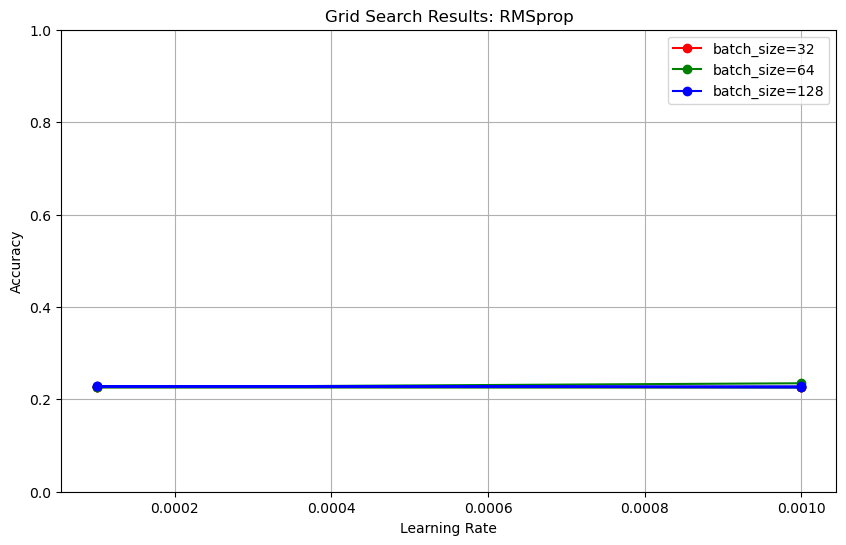

In [65]:
# Plot the results
plt.figure(figsize=(10,6))
plt.title("Grid Search Results: RMSprop")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.grid(True)
plt.ylim([0,1])

for batch_size, color in zip([32, 64, 128], ['r', 'g', 'b']):
    batch_mask = results['param_batch_size'] == batch_size
    epochs = results['param_epochs'][batch_mask]
    lr = results['param_learning_rate'][batch_mask]
    accuracy = results['mean_test_score'][batch_mask]
    label = f'batch_size={batch_size}'
    plt.plot(lr, accuracy, f'{color}o-', label=label)

plt.legend()
plt.show()

# 4.3.2.1.3.	Training and Validation

In [80]:
#### Simple CNN
num_classes = 4

model_pca = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(pca_n, pca_n, 1)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Dropout(0.1),
                                    ##
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Dropout(0.1),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(1,activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    ##
                                    tf.keras.layers.Dense(num_classes,activation='softmax') # num of classes
                                    ])

model_pca.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 14, 14, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 7, 7, 32)          0         
                                                                 
 conv2d_9 (Conv2D)           (None, 5, 5, 64)          18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 2, 2, 64)         0         
 2D)                                                             
                                                                 
 dropout_13 (Dropout)        (None, 2, 2, 64)         

In [81]:
from tensorflow.keras.optimizers import RMSprop

model_pca.compile(loss='categorical_crossentropy',
               optimizer=RMSprop(learning_rate=0.001),
#              optimizer = 'Adam',
              metrics=['accuracy'])


In [82]:
from keras.utils import to_categorical

# Convert the target tensor to one-hot encoded format
y_train_one_hot = to_categorical(y_train, num_classes=4)
y_val_one_hot = to_categorical(y_val, num_classes=4)


In [84]:
# Train the model using the one-hot encoded target tensor
model_pca_fit = model_pca.fit(x=X_train_pca, 
                      y=y_train_one_hot,
                       batch_size=64, 
                      steps_per_epoch=5,
                      epochs=50, 
                      validation_data=(X_val_pca, y_val_one_hot)
                     )

Epoch 1/50
5/5 [==============================] - 1s 43ms/step - loss: 1.4580 - accuracy: 0.2500 - val_loss: 1.3866 - val_accuracy: 0.2500
Epoch 2/50
5/5 [==============================] - 0s 19ms/step - loss: 1.3864 - accuracy: 0.2500 - val_loss: 1.3867 - val_accuracy: 0.2500
Epoch 3/50
5/5 [==============================] - 0s 18ms/step - loss: 1.3868 - accuracy: 0.2094 - val_loss: 1.3864 - val_accuracy: 0.2500
Epoch 4/50
5/5 [==============================] - 0s 19ms/step - loss: 1.3865 - accuracy: 0.2250 - val_loss: 1.3864 - val_accuracy: 0.2133
Epoch 5/50
5/5 [==============================] - 0s 20ms/step - loss: 1.3862 - accuracy: 0.2719 - val_loss: 1.3867 - val_accuracy: 0.2133
Epoch 6/50
5/5 [==============================] - 0s 19ms/step - loss: 1.3863 - accuracy: 0.2469 - val_loss: 1.3867 - val_accuracy: 0.2133
Epoch 7/50
5/5 [==============================] - 0s 20ms/step - loss: 1.3864 - accuracy: 0.2208 - val_loss: 1.3867 - val_accuracy: 0.2133
Epoch 8/50
5/5 [===========

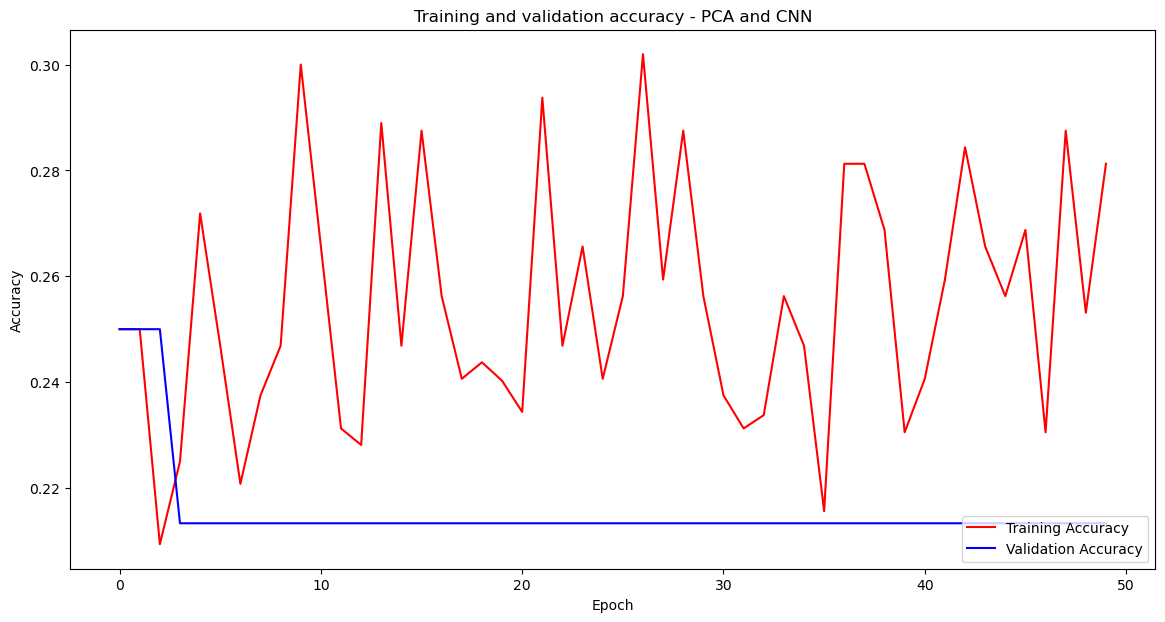

In [85]:
acc=model_pca_fit.history['accuracy']
val_acc=model_pca_fit.history['val_accuracy']
loss=model_pca_fit.history['loss']
val_loss=model_pca_fit.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy - PCA and CNN')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss - PCA and CNN')

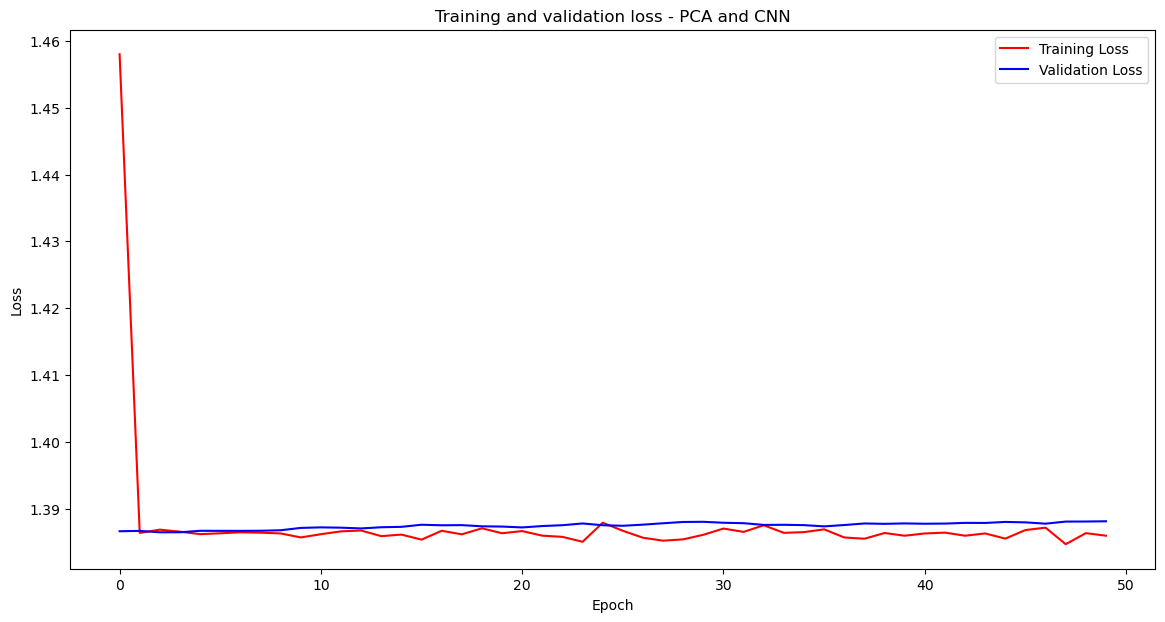

In [86]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss - PCA and CNN')
     

# 4.3.1. Train, Validation, and Testing Split (PCA X)

In [16]:
# pip install split-folders

In [72]:
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
#Train, val, test
splitfolders.ratio(input_folder, output= output_folder, 
                   seed=42, ratio=(.7, .2, .1), 
                   group_prefix=None) # default values

Copying files: 3000 files [00:04, 674.31 files/s]


# 4.2.2. Images Rescaling and Formatting

In [89]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [90]:
train_dataset = train.flow_from_directory(train_folder,
                                           target_size=(224, 224),
                                           batch_size=32,
                                           class_mode='categorical')

validation_dataset = validation.flow_from_directory(validation_folder,
                                           target_size=(224, 224),
                                           batch_size=32,
                                           class_mode='categorical')
test_dataset = test.flow_from_directory(test_folder,
                                           target_size=(224, 224),
                                           batch_size=32,
                                           class_mode='categorical')

Found 2100 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 300 images belonging to 4 classes.


In [119]:
train_dataset.classes

array([0, 0, 0, ..., 3, 3, 3])

In [120]:
train_dataset.class_indices

{'angry': 0, 'happy': 1, 'relaxed': 2, 'sad': 3}

# 4.3.2.2.3. Training and Validation - Model 1: Simple CNN

In [121]:
num_classes = 4

model_cnn = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Dropout(0.1),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Dropout(0.1),
                                    #
                                    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Dropout(0.1),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    ##
                                    tf.keras.layers.Dense(num_classes,activation='softmax') # num of classes
                                    ])

model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_99 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 111, 111, 32)      0         
                                                                 
 conv2d_100 (Conv2D)         (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 54, 54, 64)       

In [122]:
from tensorflow.keras.optimizers import RMSprop

model_cnn.compile(loss='categorical_crossentropy',
#               optimizer=RMSprop(learning_rate=0.001),
              optimizer = 'Adam',
              metrics=['accuracy'])


In [123]:
model_cnn_fit = model_cnn.fit(train_dataset,
                     steps_per_epoch = 5,
                      epochs = 50,
                      validation_data = validation_dataset
                     )

Epoch 1/50
5/5 [==============================] - 14s 3s/step - loss: 5.0239 - accuracy: 0.3313 - val_loss: 1.5123 - val_accuracy: 0.2633
Epoch 2/50
5/5 [==============================] - 11s 2s/step - loss: 1.5521 - accuracy: 0.2688 - val_loss: 1.3897 - val_accuracy: 0.2500
Epoch 3/50
5/5 [==============================] - 11s 2s/step - loss: 1.3892 - accuracy: 0.3446 - val_loss: 1.3933 - val_accuracy: 0.2900
Epoch 4/50
5/5 [==============================] - 12s 3s/step - loss: 1.3940 - accuracy: 0.2625 - val_loss: 1.3849 - val_accuracy: 0.2667
Epoch 5/50
5/5 [==============================] - 12s 3s/step - loss: 1.3822 - accuracy: 0.3063 - val_loss: 1.3891 - val_accuracy: 0.2500
Epoch 6/50
5/5 [==============================] - 11s 2s/step - loss: 1.3866 - accuracy: 0.3108 - val_loss: 1.3844 - val_accuracy: 0.3083
Epoch 7/50
5/5 [==============================] - 12s 3s/step - loss: 1.3832 - accuracy: 0.2688 - val_loss: 1.3836 - val_accuracy: 0.2550
Epoch 8/50
5/5 [==================

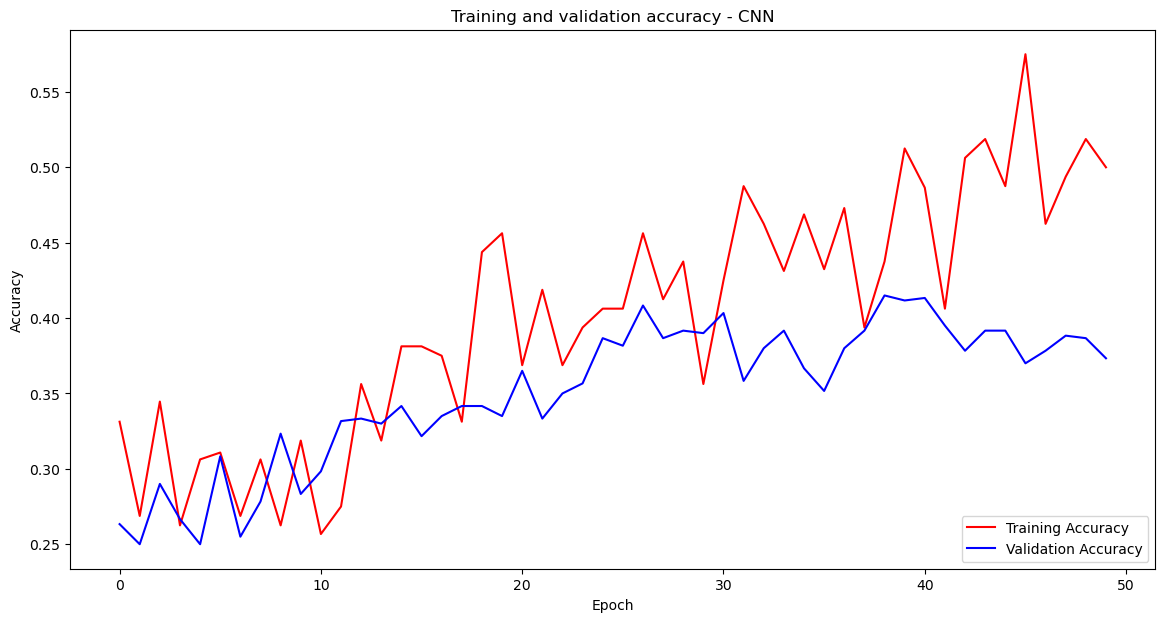

In [124]:
acc=model_cnn_fit.history['accuracy']
val_acc=model_cnn_fit.history['val_accuracy']
loss=model_cnn_fit.history['loss']
val_loss=model_cnn_fit.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy - CNN')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss - CNN')

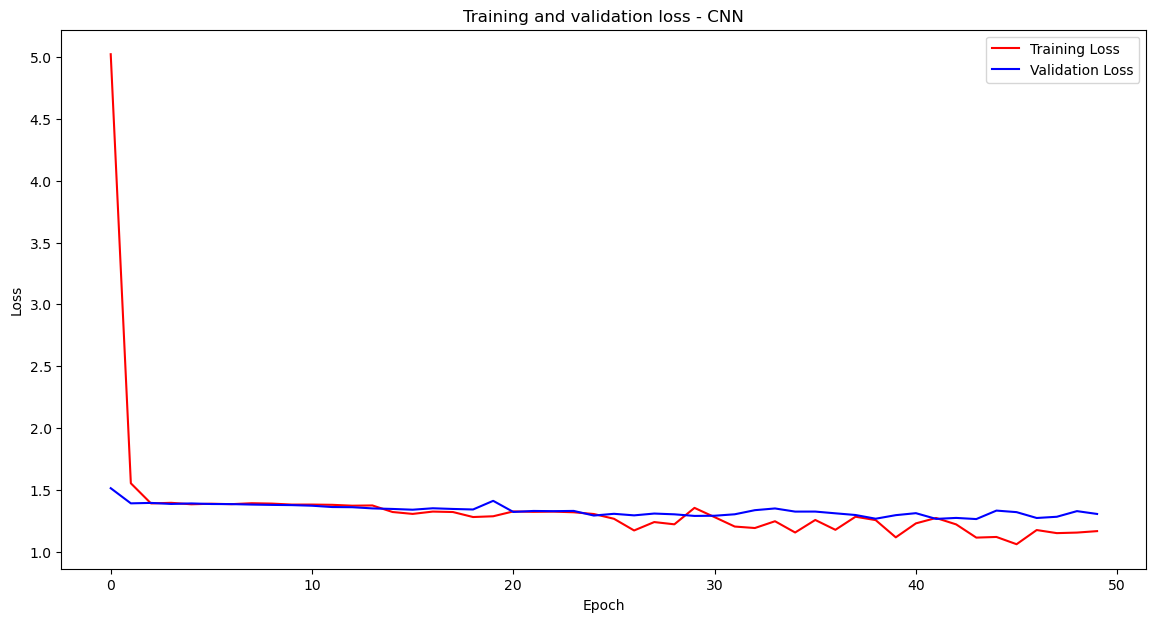

In [125]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss - CNN')
     

# 4.3.3.	Training Model 2: Interception V3 Algorithm

In [105]:
### Model 2

num_classes = 4

# Load the pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add your own classification layers on top of the base model
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
predictions = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

# Define the new model
model_inc = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model with appropriate loss and optimizer functions
model_inc.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_inc.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_33 (Conv2D)             (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_10 (BatchN  (None, 111, 111, 32  96         ['conv2d_33[0][0]']              
 ormalization)                  )                                                             

 conv2d_44 (Conv2D)             (None, 25, 25, 32)   6144        ['average_pooling2d[0][0]']      
                                                                                                  
 batch_normalization_15 (BatchN  (None, 25, 25, 64)  192         ['conv2d_38[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_17 (BatchN  (None, 25, 25, 64)  192         ['conv2d_40[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_20 (BatchN  (None, 25, 25, 96)  288         ['conv2d_43[0][0]']              
 ormalization)                                                                                    
          

                                                                                                  
 conv2d_55 (Conv2D)             (None, 25, 25, 64)   18432       ['mixed1[0][0]']                 
                                                                                                  
 batch_normalization_32 (BatchN  (None, 25, 25, 64)  192         ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 25, 25, 64)   0           ['batch_normalization_32[0][0]'] 
                                                                                                  
 conv2d_53 (Conv2D)             (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_56

                                                                                                  
 activation_29 (Activation)     (None, 12, 12, 96)   0           ['batch_normalization_39[0][0]'] 
                                                                                                  
 max_pooling2d_23 (MaxPooling2D  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
 )                                                                                                
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_23[0][0]']       
                                                                                                  
 conv2d_67

 mixed4 (Concatenate)           (None, 12, 12, 768)  0           ['activation_30[0][0]',          
                                                                  'activation_33[0][0]',          
                                                                  'activation_38[0][0]',          
                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_77 (Conv2D)             (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_54 (BatchN  (None, 12, 12, 160)  480        ['conv2d_77[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

 conv2d_87 (Conv2D)             (None, 12, 12, 160)  122880      ['mixed5[0][0]']                 
                                                                                                  
 batch_normalization_64 (BatchN  (None, 12, 12, 160)  480        ['conv2d_87[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_64[0][0]'] 
                                                                                                  
 conv2d_88 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_65 (BatchN  (None, 12, 12, 160)  480        ['conv2d_88[0][0]']              
 ormalizat

 activation_64 (Activation)     (None, 12, 12, 192)  0           ['batch_normalization_74[0][0]'] 
                                                                                                  
 conv2d_98 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_64[0][0]']          
                                                                                                  
 batch_normalization_75 (BatchN  (None, 12, 12, 192)  576        ['conv2d_98[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 12, 12, 192)  0           ['batch_normalization_75[0][0]'] 
                                                                                                  
 conv2d_94 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
          

 ormalization)                                                                                    
                                                                                                  
 activation_73 (Activation)     (None, 12, 12, 192)  0           ['batch_normalization_83[0][0]'] 
                                                                                                  
 conv2d_103 (Conv2D)            (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_107 (Conv2D)            (None, 12, 12, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_80 (BatchN  (None, 12, 12, 192)  576        ['conv2d_103[0][0]']             
 ormalization)                                                                                    
          

 ormalization)                                                                                    
                                                                                                  
 conv2d_117 (Conv2D)            (None, 5, 5, 192)    245760      ['average_pooling2d_7[0][0]']    
                                                                                                  
 batch_normalization_86 (BatchN  (None, 5, 5, 320)   960         ['conv2d_109[0][0]']             
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_88[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_89[0][0]'] 
          

                                                                                                  
 activation_87 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_97[0][0]'] 
                                                                                                  
 activation_88 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_98[0][0]'] 
                                                                                                  
 activation_91 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_101[0][0]']
                                                                                                  
 activation_92 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_102[0][0]']
                                                                                                  
 batch_normalization_103 (Batch  (None, 5, 5, 192)   576         ['conv2d_126[0][0]']             
 Normaliza

In [110]:
model_inc_fit = model_inc.fit(train_dataset,
                     steps_per_epoch = 5,
                      epochs = 50,
                      validation_data = validation_dataset
                     )

Epoch 1/50
5/5 [==============================] - 26s 5s/step - loss: 3.4109 - accuracy: 0.2313 - val_loss: 2.1749 - val_accuracy: 0.3100
Epoch 2/50
5/5 [==============================] - 26s 6s/step - loss: 2.2346 - accuracy: 0.3000 - val_loss: 1.4408 - val_accuracy: 0.3917
Epoch 3/50
5/5 [==============================] - 25s 6s/step - loss: 1.3727 - accuracy: 0.4250 - val_loss: 1.2309 - val_accuracy: 0.4950
Epoch 4/50
5/5 [==============================] - 30s 7s/step - loss: 1.2471 - accuracy: 0.5188 - val_loss: 1.2444 - val_accuracy: 0.4950
Epoch 5/50
5/5 [==============================] - 38s 9s/step - loss: 1.1185 - accuracy: 0.5312 - val_loss: 1.0590 - val_accuracy: 0.5700
Epoch 6/50
5/5 [==============================] - 38s 9s/step - loss: 1.0174 - accuracy: 0.6062 - val_loss: 0.9940 - val_accuracy: 0.5950
Epoch 7/50
5/5 [==============================] - 37s 9s/step - loss: 0.8378 - accuracy: 0.6750 - val_loss: 0.9620 - val_accuracy: 0.6267
Epoch 8/50
5/5 [==================

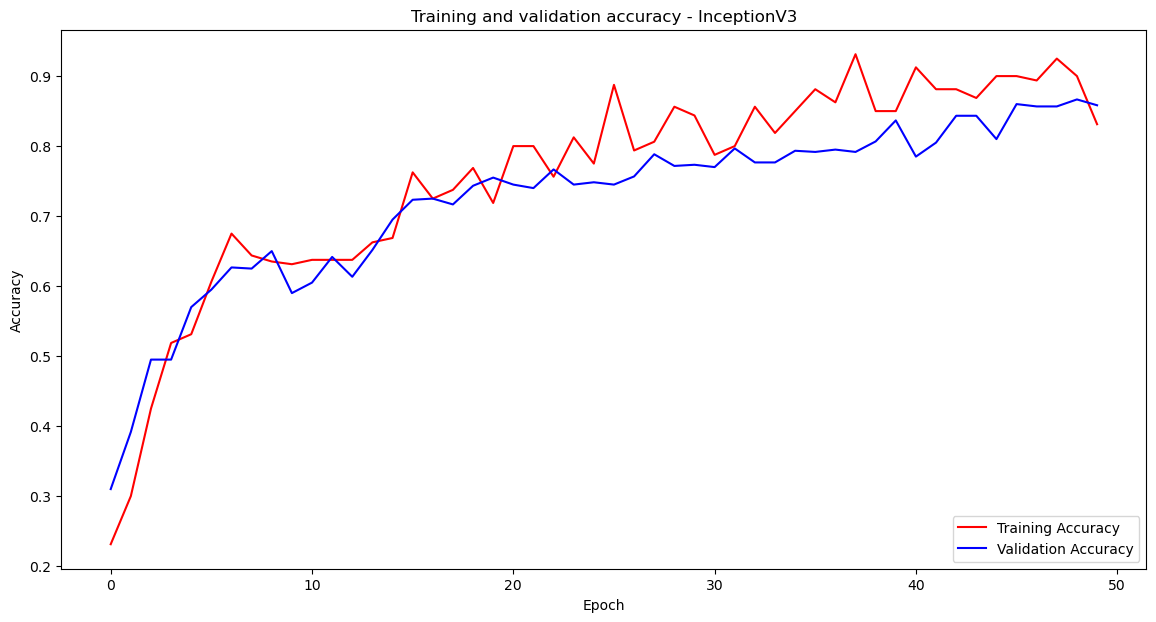

In [111]:
acc=model_inc_fit.history['accuracy']
val_acc=model_inc_fit.history['val_accuracy']
loss=model_inc_fit.history['loss']
val_loss=model_inc_fit.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy - InceptionV3')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss - InceptionV3')

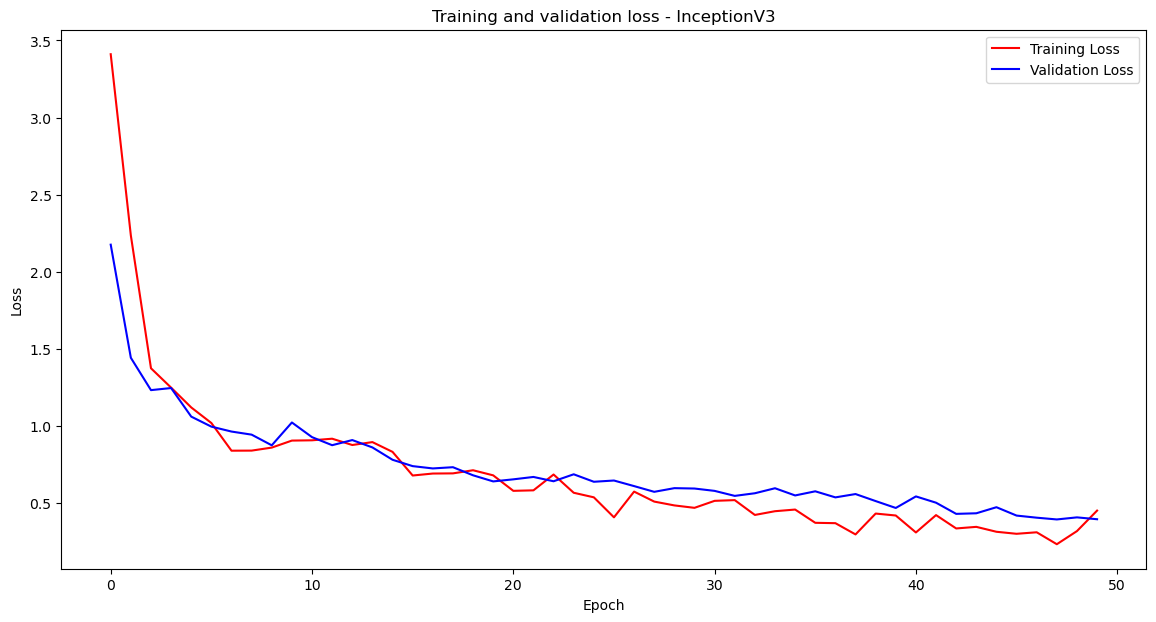

In [112]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss - InceptionV3')
     

# 4.3.4.	Training Model 3: AlexNet

In [87]:
num_classes = 4

model_alexnet = tf.keras.models.Sequential([
    # 1st Convolutional Layer
    tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.BatchNormalization(),

    # 2nd Convolutional Layer
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.BatchNormalization(),

    # 3rd Convolutional Layer
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),

    # 4th Convolutional Layer
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),

    # 5th Convolutional Layer
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.BatchNormalization(),

    # Flatten Layer
    tf.keras.layers.Flatten(),

    # 1st Dense Layer
    tf.keras.layers.Dense(units=4096, activation='relu'),
    tf.keras.layers.Dropout(0.4),

    # 2nd Dense Layer
    tf.keras.layers.Dense(units=4096, activation='relu'),
    tf.keras.layers.Dropout(0.4),

    # Output Softmax Layer
    tf.keras.layers.Dense(units=num_classes, activation='softmax')
])

model_alexnet.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 26, 26, 96)       0         
 g2D)                                                            
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_11 (Conv2D)          (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 12, 12, 256)      0         
 g2D)                                                            
                                                      

In [91]:
model_alexnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_alexnet_fit = model_alexnet.fit(train_dataset,
                     steps_per_epoch = 5,
                      epochs = 50,
                      validation_data = validation_dataset
                     )


Epoch 1/50
5/5 [==============================] - 11s 2s/step - loss: 15.6668 - accuracy: 0.2230 - val_loss: 18.1484 - val_accuracy: 0.2500
Epoch 2/50
5/5 [==============================] - 11s 2s/step - loss: 9.5327 - accuracy: 0.2812 - val_loss: 63.0953 - val_accuracy: 0.2500
Epoch 3/50
5/5 [==============================] - 11s 2s/step - loss: 6.5021 - accuracy: 0.2365 - val_loss: 96.0782 - val_accuracy: 0.2467
Epoch 4/50
5/5 [==============================] - 12s 3s/step - loss: 4.5972 - accuracy: 0.3187 - val_loss: 89.5906 - val_accuracy: 0.2467
Epoch 5/50
5/5 [==============================] - 12s 3s/step - loss: 3.5450 - accuracy: 0.2875 - val_loss: 26.1564 - val_accuracy: 0.2633
Epoch 6/50
5/5 [==============================] - 12s 3s/step - loss: 2.9646 - accuracy: 0.2562 - val_loss: 45.3330 - val_accuracy: 0.2817
Epoch 7/50
5/5 [==============================] - 12s 3s/step - loss: 2.5039 - accuracy: 0.2875 - val_loss: 11.5853 - val_accuracy: 0.2900
Epoch 8/50
5/5 [==========

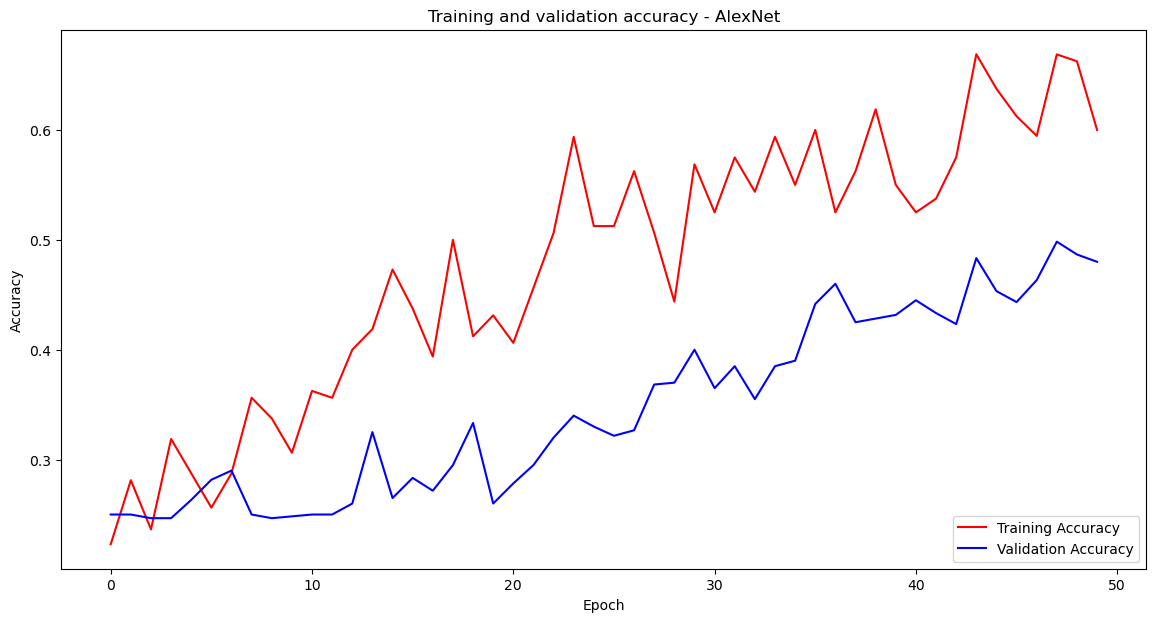

In [92]:
acc=model_alexnet_fit.history['accuracy']
val_acc=model_alexnet_fit.history['val_accuracy']
loss=model_alexnet_fit.history['loss']
val_loss=model_alexnet_fit.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy - AlexNet')
plt.legend(loc='lower right')
plt.show()


Text(0.5, 1.0, 'Training and validation loss - AlexNet')

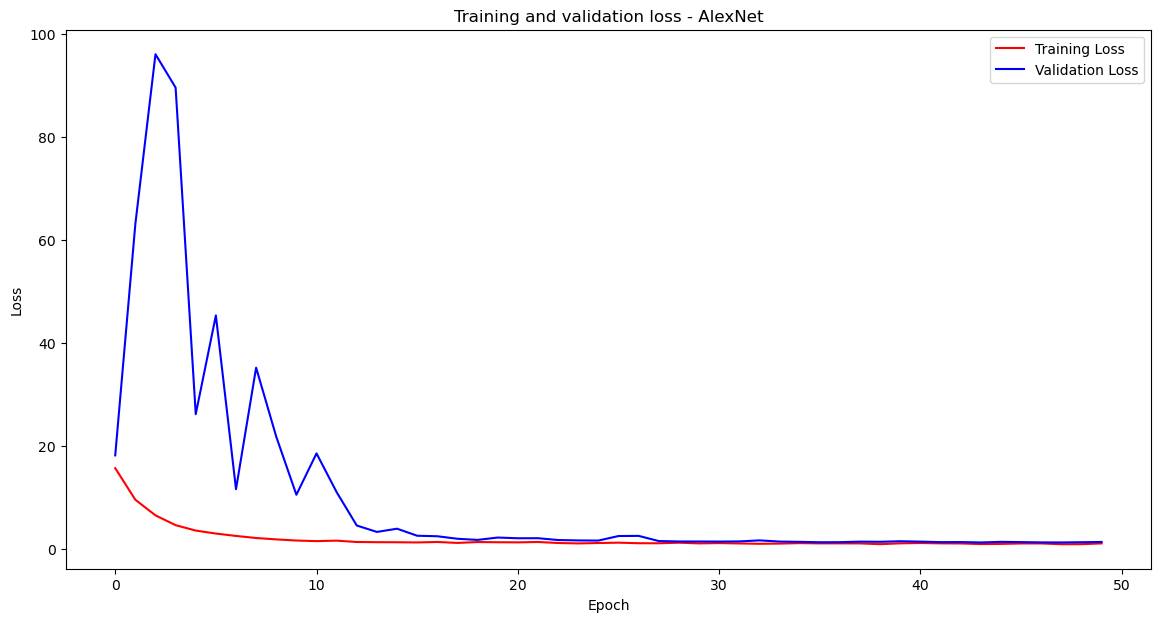

In [93]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss - AlexNet')
     

# 4.3.5.	Training Model 4: OverFeat

In [94]:
num_classes = 4

model_overfeat = tf.keras.models.Sequential([
    # First convolutional layer
    tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.BatchNormalization(),

    # Second convolutional layer
    tf.keras.layers.Conv2D(256, (5,5), strides=(1,1), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.BatchNormalization(),

    # Third convolutional layer
    tf.keras.layers.Conv2D(512, (3,3), strides=(1,1), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),

    # Fourth convolutional layer
    tf.keras.layers.Conv2D(1024, (3,3), strides=(1,1), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),

    # Fifth convolutional layer
    tf.keras.layers.Conv2D(1024, (3,3), strides=(1,1), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.BatchNormalization(),

    # Flatten and fully connected layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3072, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model_overfeat.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 batch_normalization_5 (Batc  (None, 27, 27, 96)       384       
 hNormalization)                                                 
                                                                 
 conv2d_16 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 256)      0         
 g2D)                                                            
                                                      

In [95]:
model_overfeat.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_overfeat_fit = model_overfeat.fit(train_dataset,
                     steps_per_epoch = 5,
                      epochs = 50,
                      validation_data = validation_dataset
                     )


Epoch 1/50
5/5 [==============================] - 38s 8s/step - loss: 20.8157 - accuracy: 0.3063 - val_loss: 66.5508 - val_accuracy: 0.2467
Epoch 2/50
5/5 [==============================] - 37s 8s/step - loss: 22.0294 - accuracy: 0.3063 - val_loss: 156.1477 - val_accuracy: 0.2767
Epoch 3/50
5/5 [==============================] - 39s 9s/step - loss: 22.4768 - accuracy: 0.2438 - val_loss: 318.5800 - val_accuracy: 0.2650
Epoch 4/50
5/5 [==============================] - 52s 12s/step - loss: 19.9824 - accuracy: 0.3438 - val_loss: 379.5580 - val_accuracy: 0.2633
Epoch 5/50
5/5 [==============================] - 49s 11s/step - loss: 16.4121 - accuracy: 0.2875 - val_loss: 653.9853 - val_accuracy: 0.2500
Epoch 6/50
5/5 [==============================] - 38s 9s/step - loss: 13.1074 - accuracy: 0.2500 - val_loss: 252.8627 - val_accuracy: 0.2550
Epoch 7/50
5/5 [==============================] - 46s 10s/step - loss: 10.9597 - accuracy: 0.3875 - val_loss: 344.1298 - val_accuracy: 0.2500
Epoch 8/50


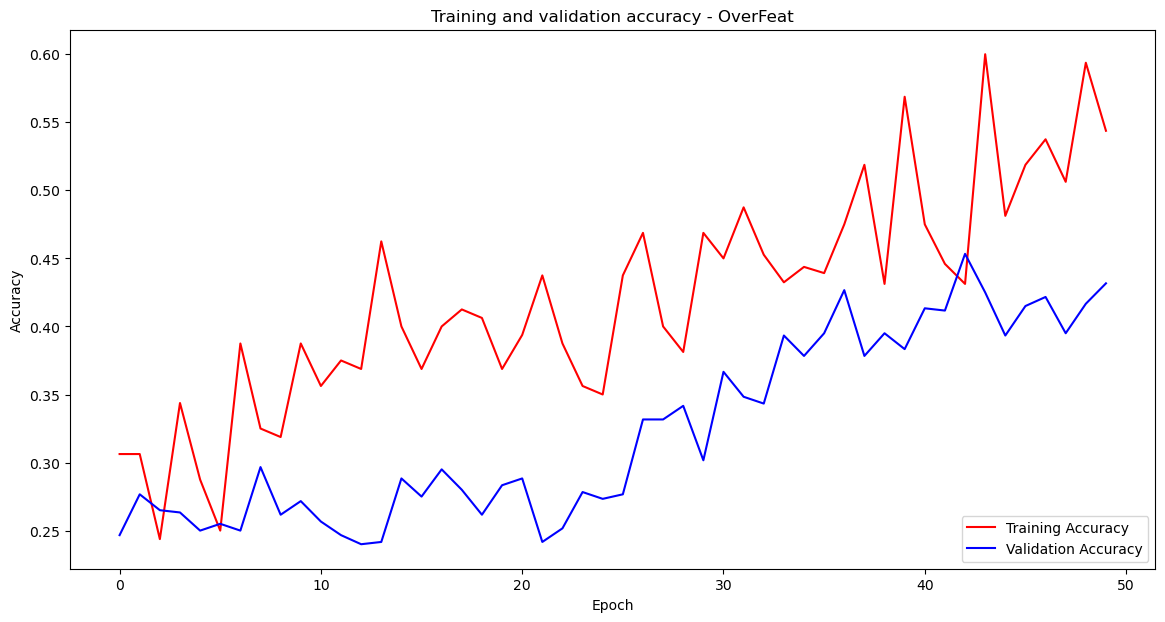

In [96]:
acc=model_overfeat_fit.history['accuracy']
val_acc=model_overfeat_fit.history['val_accuracy']
loss=model_overfeat_fit.history['loss']
val_loss=model_overfeat_fit.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy - OverFeat')
plt.legend(loc='lower right')
plt.show()


Text(0.5, 1.0, 'Training and validation loss - OverFeat')

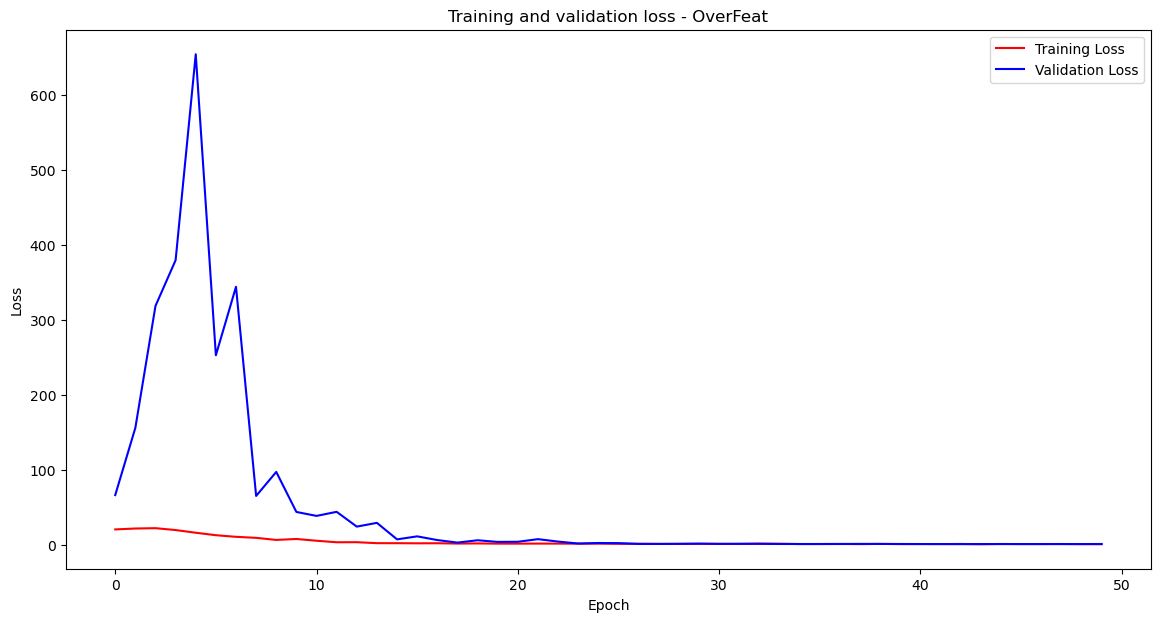

In [97]:

fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss - OverFeat')
     